In [40]:
#load libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.filterwarnings("ignore")

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv('/content/drive/MyDrive/Employee Attriation Prediction/WA_Fn-UseC_-HR-Employee-Attrition.csv')
#copy the data to another df
empdf = data.copy()

In [43]:
empdf.shape

(1470, 35)

In [44]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [45]:
empdf.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [46]:
empdf['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [47]:
# pie chart for attrition
fig = go.Figure()
fig.add_trace(go.Pie(labels=empdf['Attrition'], values=empdf['Attrition'].value_counts()))
fig.update_layout(autosize=False, width=400, height=350)
fig.show()

In [48]:
empdf.isnull().sum().sum()

0

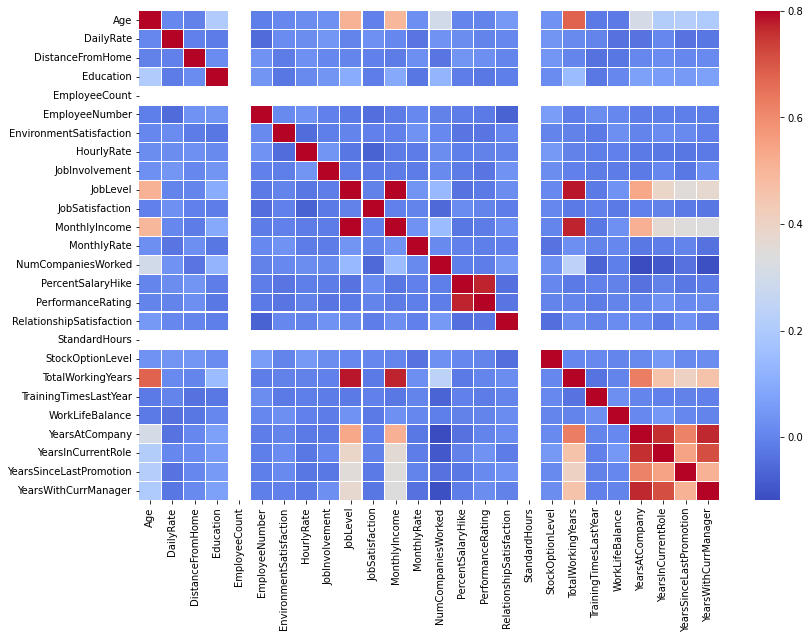

In [49]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [50]:
categorical_features = empdf.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 9


In [51]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [52]:
empdf['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

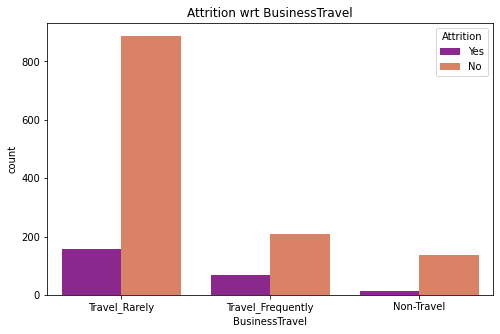

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=empdf, palette='plasma')
plt.title("Attrition wrt BusinessTravel")
plt.show()

In [54]:
# using plotly express.
fig = px.histogram(empdf, x='BusinessTravel', color='Attrition', barmode="group",
            width=650,height=390)
fig.show()

In [55]:
#Department
empdf['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

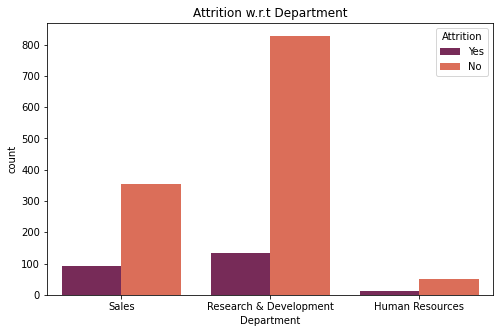

In [56]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition', data=empdf, palette='rocket')
plt.title("Attrition w.r.t Department")
plt.show()

In [57]:
#EducationField
empdf['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

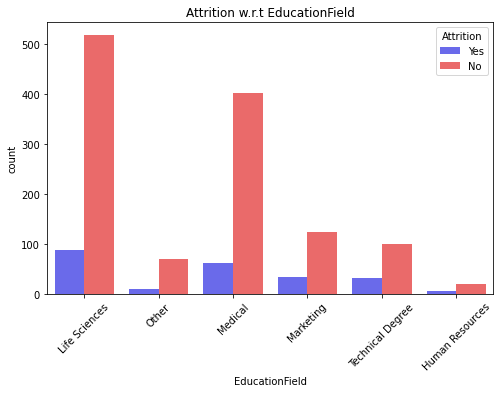

In [58]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition', data=empdf, palette='seismic')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

In [59]:
#Gender
empdf['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

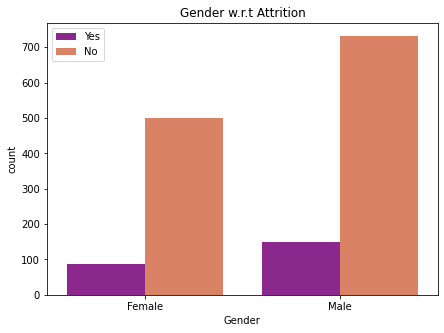

In [60]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition', data=empdf, palette='plasma')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [61]:
# let's also see, how any male and female are Married
pd.crosstab(empdf['MaritalStatus'],empdf['Gender'])

Gender,Female,Male
MaritalStatus,,
Divorced,117,210
Married,272,401
Single,199,271


In [62]:
#JobRole
empdf['JobRole'].nunique()

9

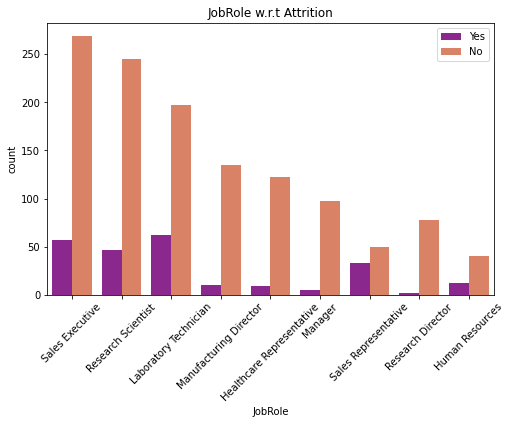

In [63]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=empdf, palette='plasma')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [64]:
#OverTime
empdf['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

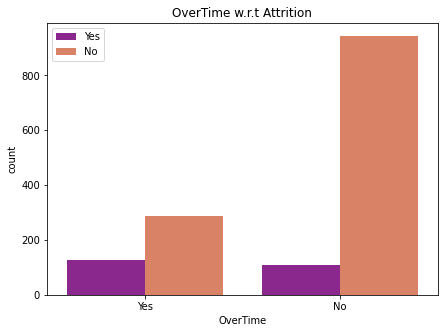

In [65]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition', data=empdf, palette='plasma')
plt.title("OverTime w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [66]:
# how many male and female do overTime
pd.crosstab(empdf['OverTime'], empdf['Gender'])

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


In [67]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O']
print("Total numerical_features", len(numerical_features))

Total numerical_features 26


In [68]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


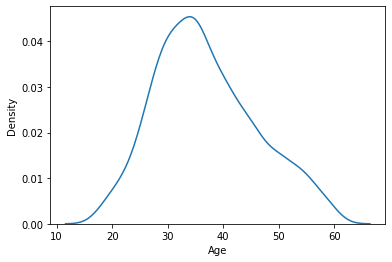

In [69]:
# distribution of age
sns.distplot(empdf['Age'],hist=False)
plt.show()

In [70]:
empdf['Age'].nunique()

43

In [71]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
empdf[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [72]:
# Education
empdf['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

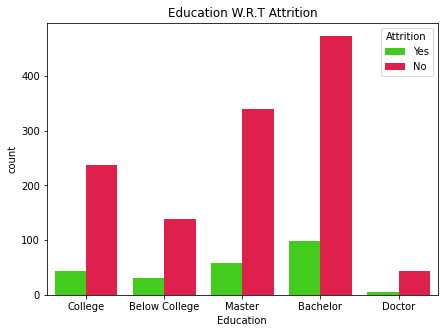

In [73]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(7,5))
sns.countplot(x=empdf['Education'].map(edu_map), hue='Attrition', data=empdf, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

In [74]:
#EnvironmentSatisfaction
empdf['EnvironmentSatisfaction'].value_counts()   # it is very nice response from employees

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [75]:
#JobInvolvement
empdf['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [76]:
empdf['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [77]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O' and feature not in ordinal_features]
print("total numerical_features",len(numerical_features))

total numerical_features 19


In [78]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2


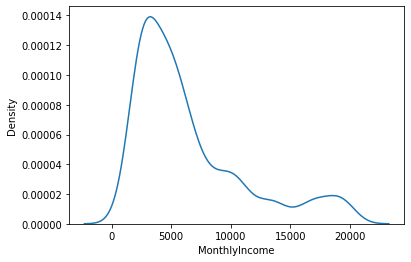

In [79]:
#MonthlyIncome
sns.distplot(empdf['MonthlyIncome'],hist=False)
plt.show()

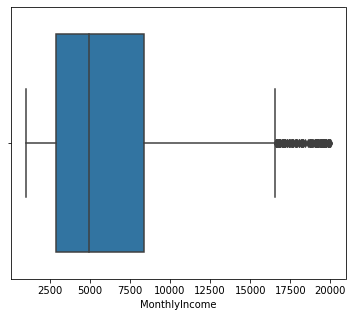

In [80]:
plt.figure(figsize=(6,5))
sns.boxplot(empdf['MonthlyIncome'])
plt.show()

In [81]:
# MonthlyIncome with respect to Age of Employee

#sns.lineplot(x='Age',y='MonthlyIncome', data=empdf)
trace = go.Scatter(x=empdf['Age'],y=empdf['MonthlyIncome'], mode="markers+lines",
                   marker=dict(size=12), line=dict(shape='spline'))
data=[trace]

layout = {"title":"Monthly Income Variation wrt Age",
           "xaxis":{"title":"Age"},
           "yaxis":{"title":"MonthlyIncome"}
         }

iplot({"data":data, "layout":layout})

In [82]:
# employee count in age group and whicg age employees are more
empdf.groupby('Age')['EmployeeCount'].sum().sort_values(ascending=False).head()

Age
35    78
34    77
36    69
31    69
29    68
Name: EmployeeCount, dtype: int64

In [83]:
#JobLevel
empdf['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

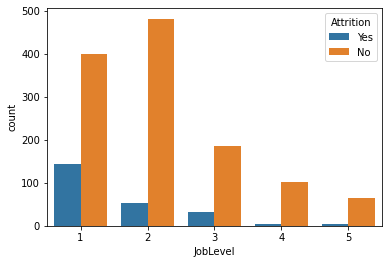

In [84]:
# JobLevel can have some effect on Attrition of Employees
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

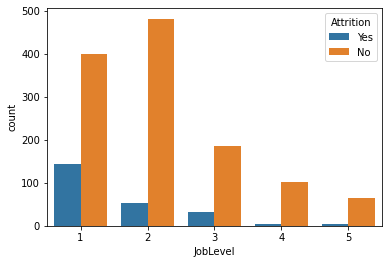

In [85]:
#NumCompaniesWorked
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

In [86]:
empdf['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [87]:
empdf["PerformanceRating"].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [88]:
empdf["RelationshipSatisfaction"].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [89]:
empdf["WorkLifeBalance"].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [90]:
empdf.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

In [91]:
empdf['Attrition'] = empdf['Attrition'].replace({'No':0,'Yes':1})

In [92]:
#encode binary variables
empdf['OverTime'] = empdf['OverTime'].map({'No':0,'Yes':1})
empdf['Gender'] = empdf['Gender'].map({'Male':0,'Female':1})

In [93]:
#encode categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(empdf[col].value_counts().index,0)}
    print(map_dict)
    empdf[col] = empdf[col].map(map_dict)

{'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}
{'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Other': 4, 'Human Resources': 5}
{'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}
{'Married': 0, 'Single': 1, 'Divorced': 2}


In [94]:
empdf.drop('Over18',axis=1,inplace=True)

In [95]:
empdf.corr()['Attrition'][:-1].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
Department                  0.077351
EducationField              0.062320
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
MaritalStatus               0.011195
PerformanceRating           0.002889
BusinessTravel             -0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
JobRole                    -0.027930
Gender                     -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Age                        -0.159205
MonthlyIncome              -0.159840
Y

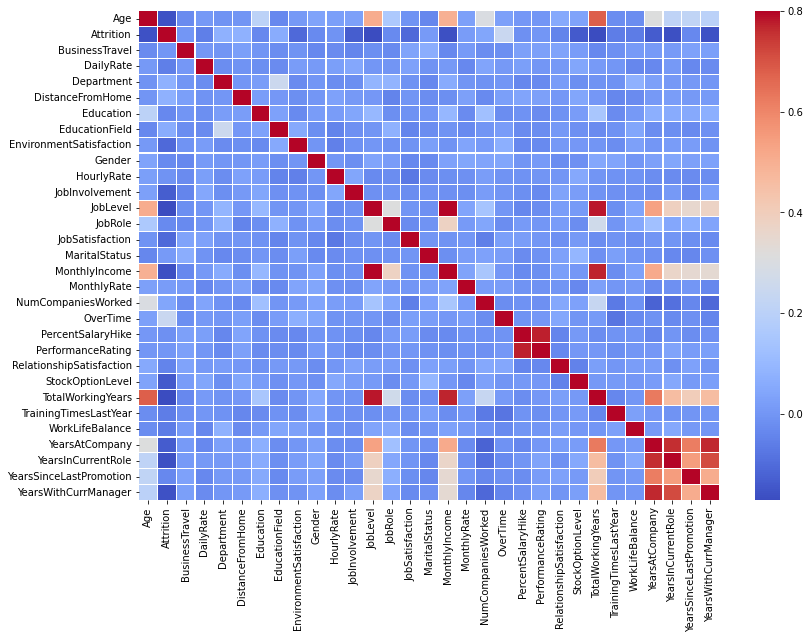

In [96]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [97]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,0,...,3,4,1,6,3,3,2,2,2,2


In [98]:
x = empdf.drop('Attrition',axis=1)
y = empdf['Attrition']

In [99]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

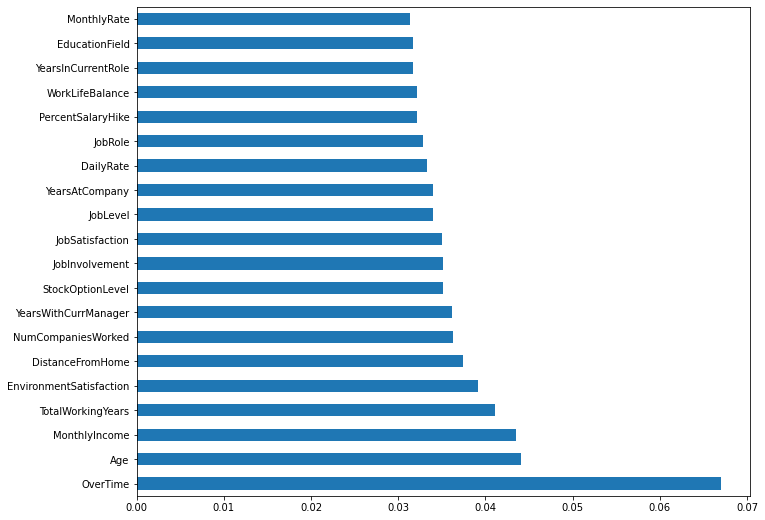

In [100]:
#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [101]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [102]:
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)
feature_importance

Age                         0.047145
BusinessTravel              0.024635
DailyRate                   0.032830
Department                  0.022846
DistanceFromHome            0.036123
Education                   0.027827
EducationField              0.030440
EnvironmentSatisfaction     0.038667
Gender                      0.021776
HourlyRate                  0.029920
JobInvolvement              0.036729
JobLevel                    0.037115
JobRole                     0.032016
JobSatisfaction             0.038042
MaritalStatus               0.026305
MonthlyIncome               0.042751
MonthlyRate                 0.030448
NumCompaniesWorked          0.032760
OverTime                    0.067278
PercentSalaryHike           0.029401
PerformanceRating           0.012112
RelationshipSatisfaction    0.033290
StockOptionLevel            0.036284
TotalWorkingYears           0.038960
TrainingTimesLastYear       0.029597
WorkLifeBalance             0.033153
YearsAtCompany              0.034636
Y

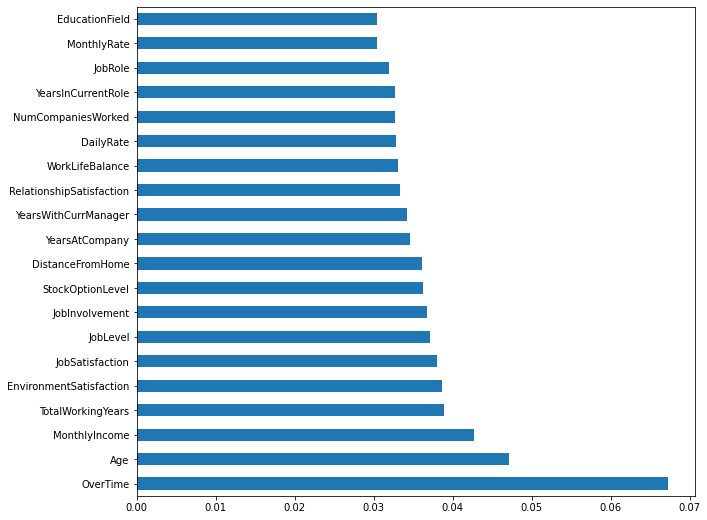

In [103]:
plt.figure(figsize=(10,9))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

In [104]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

In [105]:
#split data into train and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [106]:
#models
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [107]:
#logistic regression
log_clf.fit(x_train, y_train)
pred = log_clf.predict(x_test)
print(log_clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.8722826086956522


In [108]:
#svc
svc_clf.fit(x_train, y_train)
pred = log_clf.predict(x_test)
print(svc_clf.__class__.__name__, " ", accuracy_score(y_test,pred))

SVC   0.8722826086956522


In [109]:
#KnieghboursClassifier
knn_clf.fit(x_train, y_train)
pred = knn_clf.predict(x_test)
print(knn_clf.__class__.__name__, " ", accuracy_score(y_test,pred))

KNeighborsClassifier   0.8396739130434783


In [110]:
#decision tree
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
print(dt_clf.__class__.__name__, " ", accuracy_score(y_test,pred))


DecisionTreeClassifier   0.8070652173913043


In [111]:
#Rondom forest
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(rf_clf.__class__.__name__, " ", accuracy_score(y_test,pred))

RandomForestClassifier   0.8722826086956522


In [112]:
# let's try out VotingClassifier
from sklearn.ensemble import VotingClassifier

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train,y_train)

y_pred = voting_clf.predict(x_test)
print("acuracy: ",accuracy_score(y_test,y_pred))

acuracy:  0.8695652173913043


In [113]:
# if we do same thing on scaled features
#split data into train and test set using scaled data.
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)


training shape:  (1102, 30)
testing shape:  (368, 30)


In [114]:
# Now check the accuracy score on scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.904891304347826
SVC   0.8831521739130435
KNeighborsClassifier   0.875
DecisionTreeClassifier   0.8125
RandomForestClassifier   0.8722826086956522


In [115]:
# try votingClf with scaled data

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train_scaled,y_train_scaled)

y_pred = voting_clf.predict(x_test_scaled)
print("acuracy: ",accuracy_score(y_test_scaled,y_pred))

acuracy:  0.8913043478260869


In [116]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [117]:
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME',learning_rate=0.01)

boost.fit(x_train_scaled,y_train_scaled)

predictions = boost.predict(x_test_scaled)

print("accuracy:",accuracy_score(y_test,predictions))

accuracy: 0.8722826086956522


In [118]:
#training accuracy
print("training accuracy:",boost.score(x_train_scaled,y_train_scaled))
print("testing accuracy:",boost.score(x_test_scaled,y_test_scaled))

training accuracy: 0.837568058076225
testing accuracy: 0.8722826086956522


In [119]:
# XGBOOST
xgb = XGBClassifier()

xgb.fit(x_train_scaled, y_train_scaled)

prediction = xgb.predict(x_test_scaled)

print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.8804347826086957


In [120]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [121]:
# let's first try hyperparameter tuning with RandomForest

#number of trees in forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
#max depth of tree
max_depth = [int(x) for x in np.linspace(5,30,6)]
#quality of split
criterion = ['gini','entropy']
#min no. of samples to consider for splitting a internal node
min_samples_split = [2,5,7,10]
#min number of node can be as leaf node
min_samples_leaf = [2,5,8]
# The number of features to consider when looking for the best split:
max_features = ["auto","sqrt"]

random_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                   max_features=max_features)
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [2, 5, 8], 'max_features': ['auto', 'sqrt']}


In [122]:
rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_clf, param_distributions=random_grid, cv=5, n_iter=10,
                               random_state=42, n_jobs=-1,verbose=1,)

rf_random.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=1)

In [123]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.8584204031262855
{'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy'}


In [124]:
# hyperparameter tuning for XgBoost

n_estimators = [int(x) for x in np.linspace(100,1000,10)]

max_depth = [int(x) for x in np.linspace(6,30,5)]
learning_rate = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
min_child_weight = list(range(1,10))

xg_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
               min_child_weight=min_child_weight)
print(xg_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [6, 12, 18, 24, 30], 'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [125]:
xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(xgb, param_distributions=xg_grid, cv=5, random_state=42,
                               n_iter=10,scoring="accuracy",n_jobs=-1,verbose=1)

xgb_random.fit(x_train_scaled,y_train_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.002, 0.003,
                                                          0.004, 0.005, 0.006,
                                                          0.007, 0.008, 0.009,
                                                          0.01],
                                        'max_depth': [6, 12, 18, 24, 30],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy', verbose=1)

In [126]:
print("score: ",xgb_random.best_score_)
print("best_params: \n",xgb_random.best_params_)

score:  0.8629452900041136
best_params: 
 {'n_estimators': 600, 'min_child_weight': 7, 'max_depth': 24, 'learning_rate': 0.004}


In [127]:
final =XGBClassifier()
final.fit(x,y)

XGBClassifier()

In [128]:
import joblib

In [129]:
joblib.dump(final,'mts_updated.pkl')

['mts_updated.pkl']

In [130]:
x.columns


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [131]:
joblib.dump(list(x.columns),'column_names_mts.pkl')

['column_names_mts.pkl']

In [132]:
col_names_mts = joblib.load('column_names_mts.pkl')

In [133]:
col_names_mts


['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [134]:
loaded_model_mts= joblib.load('mts_updated.pkl')

In [135]:
loaded_model_mts.predict(x_test)


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,